In [ ]:
!pip install matplotlib deap

In [ ]:
# Importing necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
# Defining the number of locations and vehicles
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

## Setting up the Genetic Algorithm model

In [ ]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

In [ ]:
# Setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

## Defining the fitness function that evaluates the model fitness

In [ ]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [ ]:
toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

## Defining the function we will be using to plot the routes

In [ ]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

## Running the Genetic Algorithm

In [ ]:
# Preparing to run the genetic algorithm

random.seed(42)  # Seed for reproducibility
pop = toolbox.population(n=300)  # Generate initial population
hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

In [ ]:
# Setup statistics to track
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

In [ ]:
# Run the genetic algorithm
algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

gen	nevals	avg    	min    
0  	300   	580.714	7.79162
1  	213   	554.914	5.47274
2  	243   	549.655	1.92411
3  	232   	542.542	1.92969
4  	233   	542.303	3.46453
5  	218   	536.293	0.21444
6  	213   	528.601	1.71616
7  	233   	529.173	6.23477
8  	219   	520.543	6.81106
9  	209   	506.615	2.80762
10 	224   	503.138	2.98688
11 	230   	498.908	2.98688
12 	230   	501.685	2.50737
13 	217   	488.167	7.79945
14 	231   	485.243	4.65293
15 	250   	466.771	3.4444 
16 	238   	437.617	4.78233
17 	236   	413.816	5.71666
18 	225   	399.138	10.6435
19 	225   	391.805	12.9651
20 	209   	390.572	5.22861
21 	232   	387.071	2.62472
22 	237   	381.024	8.9141 
23 	217   	377.699	9.38115
24 	227   	370.853	2.91138
25 	246   	370.585	4.95666
26 	233   	364.421	3.61923
27 	219   	361.395	11.0622
28 	229   	351.878	9.84786
29 	223   	345.968	13.345 
30 	238   	344.325	6.44714
31 	225   	340.483	3.39847
32 	221   	342.755	1.76407
33 	243   	334.447	10.5977
34 	232   	333.916	7.46024
35 	244   	332.492	4.71487
3

([[9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 13, 3, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 13, 3, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 13, 3, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 3, 8, 14, 0, 6, 12, 19, 10, 1, 13, 4, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 13, 3, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 13, 3, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 13, 3, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 13, 3, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 13, 3, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 13, 3, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 13, 3, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 13, 3, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 13, 3, 5, 17, 7, 16, 18, 11, 2, 15],
  [9, 4, 8, 14, 0, 10, 12, 19, 6, 1, 1

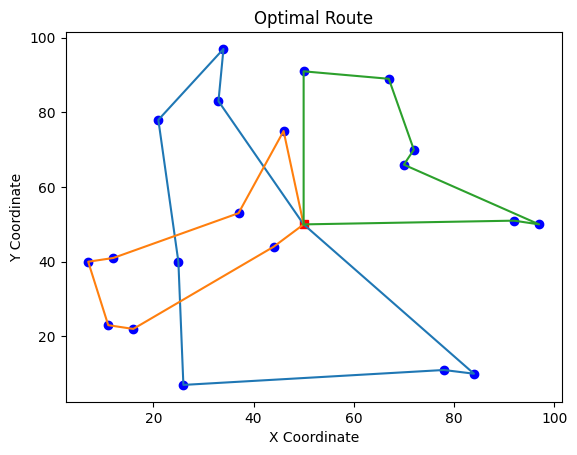

In [ ]:
# Plot the best route found
plot_routes(hof[0], "Optimal Route")

## Performing Parameter Tuning among the parameters: population sizes, mutation rates and tournament sizes

In [14]:
def parameter_tuning():
    results = []
    pop_sizes = [100, 200, 300]
    mut_rates = [0.05, 0.1, 0.2]
    tourn_sizes = [2, 3, 4]

    for pop_size in pop_sizes:
        for mut_rate in mut_rates:
            for tourn_size in tourn_sizes:
                random.seed(42)
                pop = toolbox.population(n=pop_size)
                hof = tools.HallOfFame(1)

                stats = tools.Statistics(lambda ind: ind.fitness.values)
                stats.register("avg", np.mean)
                stats.register("min", np.min)

                toolbox.unregister("mutate")
                toolbox.register("mutate", tools.mutShuffleIndexes, indpb=mut_rate)
                toolbox.unregister("select")
                toolbox.register("select", tools.selTournament, tournsize=tourn_size)

                algorithms.eaSimple(pop, toolbox, 0.7, mut_rate, 300, stats=stats, halloffame=hof)

                best_ind = hof[0]
                best_fitness = best_ind.fitness.values
                results.append((pop_size, mut_rate, tourn_size, best_fitness))

    for result in results:
        print(f"Pop Size: {result[0]}, Mut Rate: {result[1]}, Tourn Size: {result[2]}, Best Fitness: {result[3]}")

if __name__ == "__main__":
    parameter_tuning()

Streaming output truncated to the last 5000 lines.
160	139   	300.597	7.97472 
161	148   	303.29 	12.796  
162	149   	305.638	9.14597 
163	159   	302.707	8.99354 
164	136   	303.63 	8.99354 
165	135   	300.578	11.7012 
166	143   	303.589	22.1928 
167	151   	300.329	5.61406 
168	137   	299.938	12.2675 
169	137   	303.929	22.1928 
170	151   	300.941	22.1928 
171	134   	304.222	9.14597 
172	128   	303.506	8.79243 
173	139   	302.443	12.1289 
174	148   	303.093	22.1928 
175	151   	300.02 	3.57673 
176	131   	303.482	8.99354 
177	131   	305.437	15.904  
178	151   	302.353	21.0123 
179	160   	302.168	11.7012 
180	135   	301.056	19.4492 
181	136   	301.906	11.0413 
182	151   	299.741	9.48274 
183	127   	301.95 	21.2254 
184	142   	302.06 	12.1806 
185	129   	301.222	14.8862 
186	149   	301.065	17.97   
187	147   	301.794	8.12622 
188	153   	301.512	3.51611 
189	145   	302.844	7.23248 
190	142   	303.246	22.1928 
191	145   	301.931	9.14597 
192	156   	302.431	22.1928 
193	138   	301.355	19.040

## Plotting the fitness score over generations

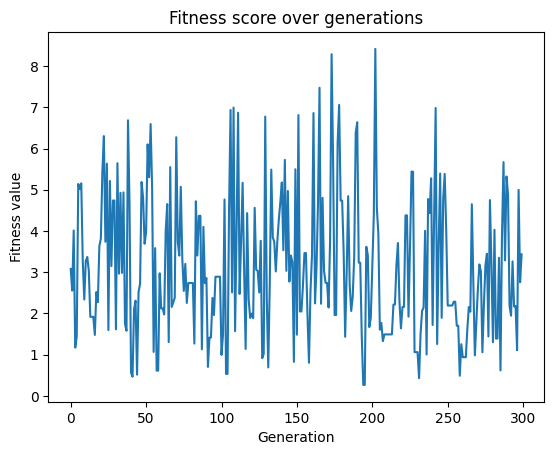

In [23]:
def plot_fitness_over_generations():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    fitness_values = []
    for gen in range(300):
        offspring = algorithms.varAnd(pop, toolbox, 0.7, 0.2)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        hof.update(offspring)
        record = stats.compile(offspring)
        fitness_values.append(record["min"])
        pop = offspring

    plt.plot(fitness_values)
    plt.xlabel("Generation")
    plt.ylabel("Fitness value")
    plt.title("Fitness score over generations")
    plt.show()

if __name__ == "__main__":
    plot_fitness_over_generations()

## Calculating the diveristy in the population

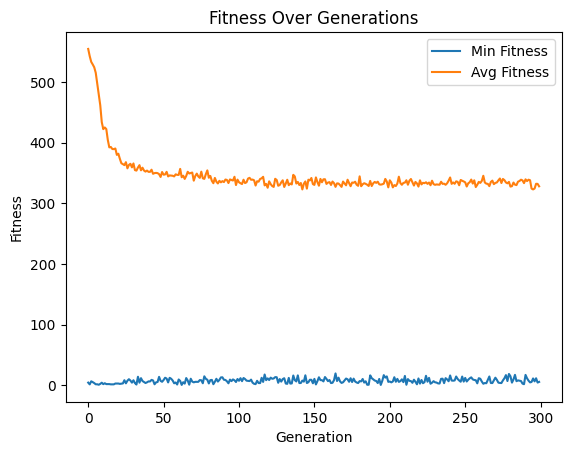

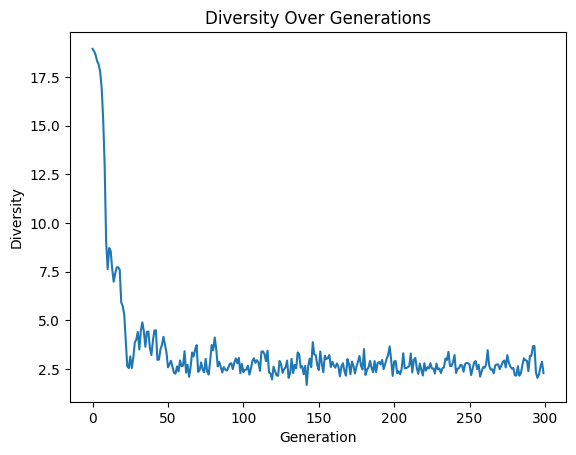

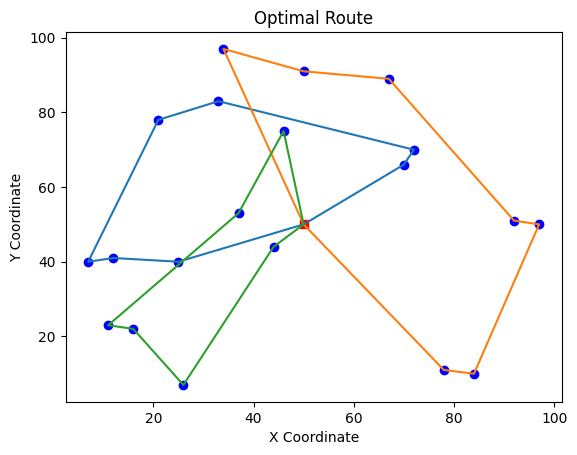

In [24]:
def calculate_diversity(pop):
    """Calculate the average pairwise distance between individuals in the population."""
    diversity = 0
    num_individuals = len(pop)
    for i in range(num_individuals):
        for j in range(i + 1, num_individuals):
            diversity += sum(1 for a, b in zip(pop[i], pop[j]) if a != b)
    diversity /= num_individuals * (num_individuals - 1) / 2
    return diversity

def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    stats_log = []
    diversity_log = []

    for gen in range(300):
        pop, logbook = algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 1, stats=stats, halloffame=hof, verbose=False)
        stats_log.append(stats.compile(pop))
        diversity_log.append(calculate_diversity(pop))

    # Plot fitness over generations
    plot_fitness(stats_log, "Fitness Over Generations")

    # Plot diversity over generations
    plt.figure()
    plt.plot(range(len(diversity_log)), diversity_log)
    plt.xlabel('Generation')
    plt.ylabel('Diversity')
    plt.title('Diversity Over Generations')
    plt.show()

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()